In [7]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-02-08 03:21:45--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.139.100, 74.125.139.139, 74.125.139.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.139.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s94tid8gjq3il00mu8fsa8shgoqat6is/1675826475000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=318d48e6-4b3f-446a-92c1-452dba29bac0 [following]
--2023-02-08 03:21:48--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s94tid8gjq3il00mu8fsa8shgoqat6is/1675826475000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=318d48e6-4b3f-446a-92c1-452dba29bac0
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.162.132, 2607:f8b0:400c:c38::84
Connecting to doc-0

In [14]:
import glob, os
import numpy as np
import matplotlib.pyplot as plt

#此段程式碼展示如何讀取ECG檔案，並依照學員需求將心跳訊號畫出, 並由CH1-CH2 取得二導層(Lead-2)資料獲得完整ECG的PQRST

Filename = "01徐純浩_20230208095704_test_bleEXGdata.txt"
data = np.loadtxt(Filename, dtype=np.float32)
fs = 250

CH1 = data[:,0];
CH1 = CH1[30*fs :(CH1.size -(30*fs))];
CH2 = data[:,1];
CH2 = CH2[30*fs :(CH2.size -(30*fs))];
CH3 = CH1-CH2;

print( '心跳資料共'+ str(np.size(CH3)/fs) + '秒')

心跳資料共116.04秒


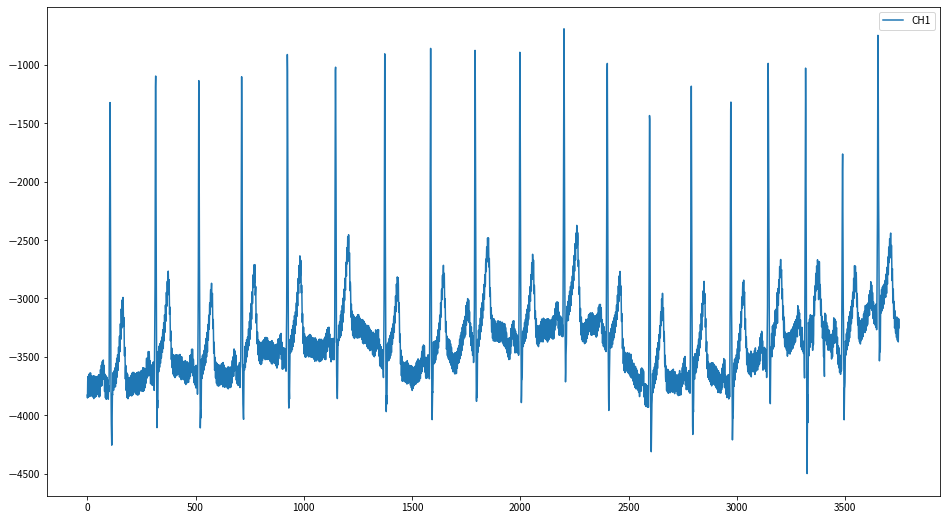

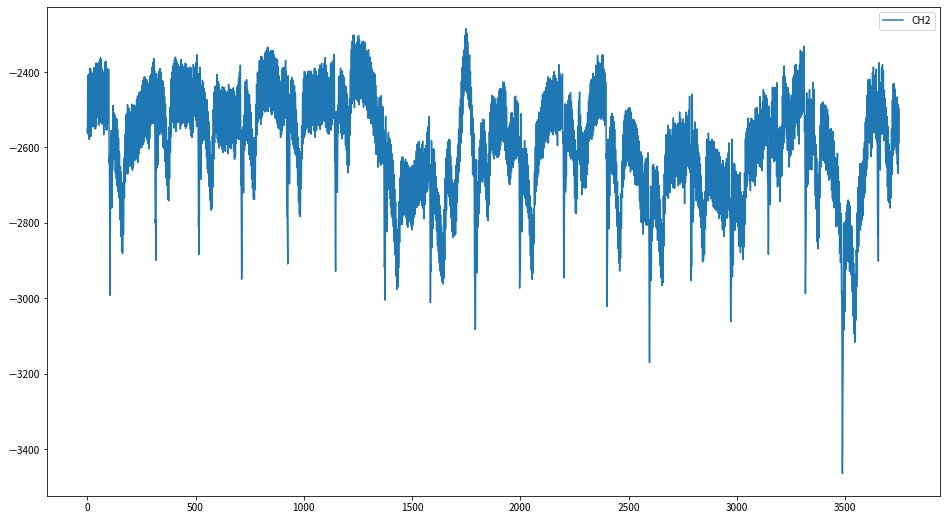

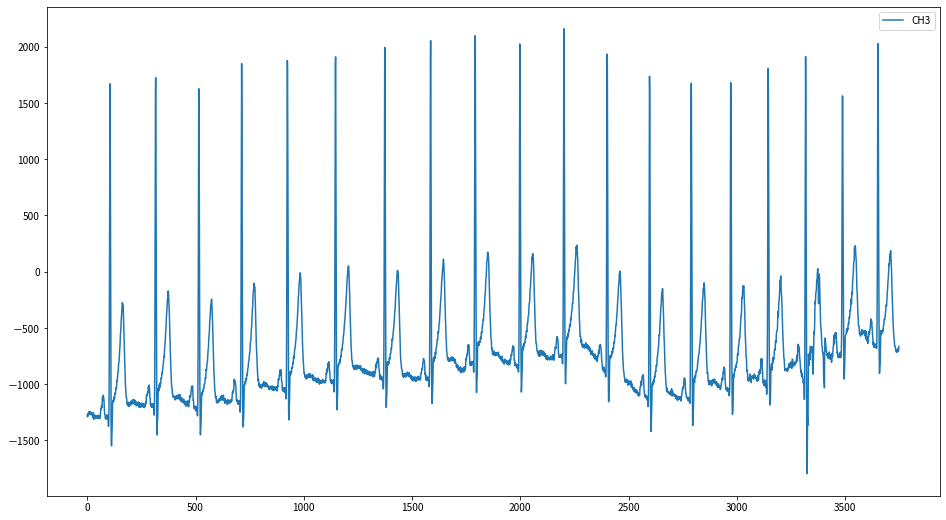

In [15]:
#此段程式碼繪畫收到的波形圖, 並且顯示正常的PQRST
time_start = 30
time_end = 45


plt.rcParams["figure.figsize"] = (16, 9)
plt.figure(1);
plt.clf();
plt.plot(CH1[time_start*fs: time_end*fs], label='CH1')
plt.legend(loc='best')

plt.figure(2);
plt.plot(CH2[time_start*fs: time_end*fs], label='CH2')
plt.legend(loc='best')

plt.figure(3);
plt.plot(CH3[time_start*fs: time_end*fs], label='CH3')
plt.legend(loc='best')

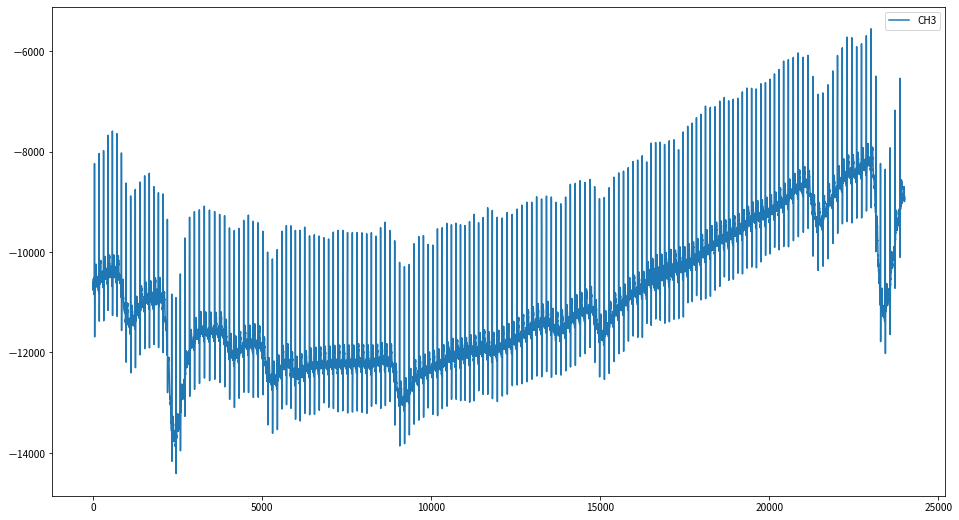

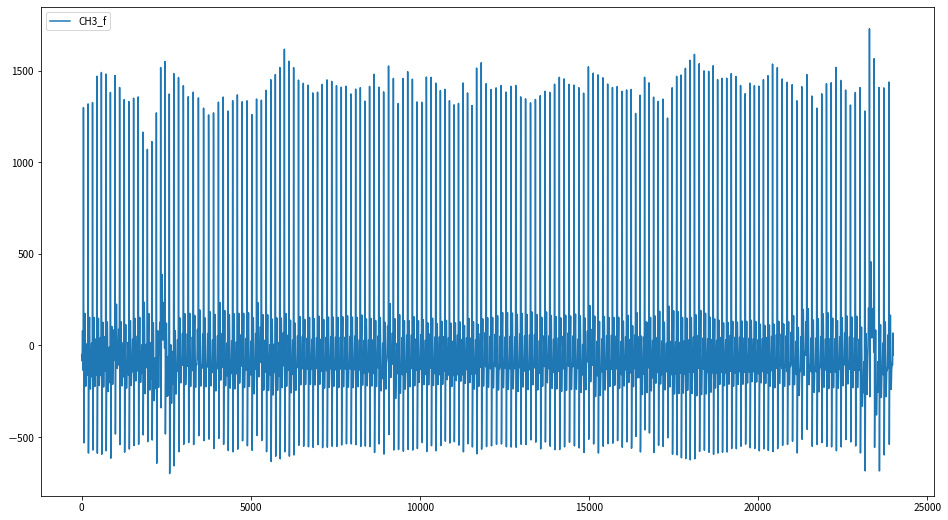

In [ ]:
#此段程式碼展示如何透過濾波將資料近一步處理移除雜訊
from scipy.signal import butter, lfilter
lowpass = 10
highpass = 0.5
#定義巴特沃斯濾波器頻帶響應模型
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

CH3_f = butter_bandpass_filter(CH3, highpass, lowpass, fs, order=3)

time_start = 30
time_end = 150

plt.rcParams["figure.figsize"] = (16, 9)
plt.figure(1);
plt.clf();
plt.plot(CH3[time_start*fs: time_end*fs], label='CH3')
plt.legend(loc='best')

plt.figure(2);
plt.plot(CH3_f[time_start*fs: time_end*fs], label='CH3_f')
plt.legend(loc='best')

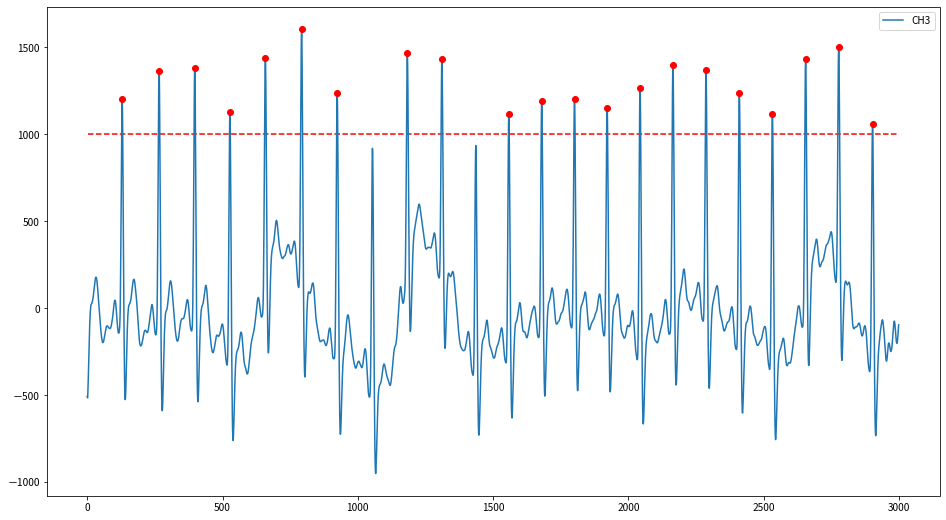

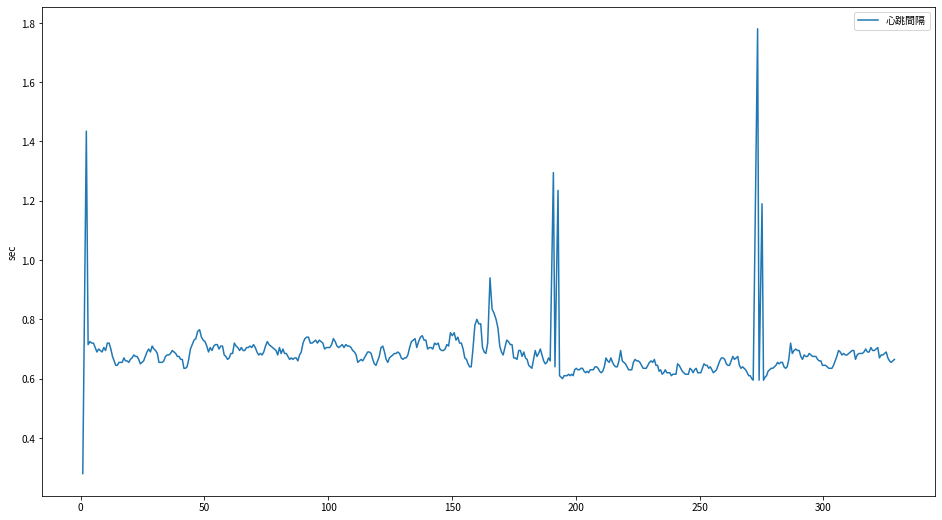

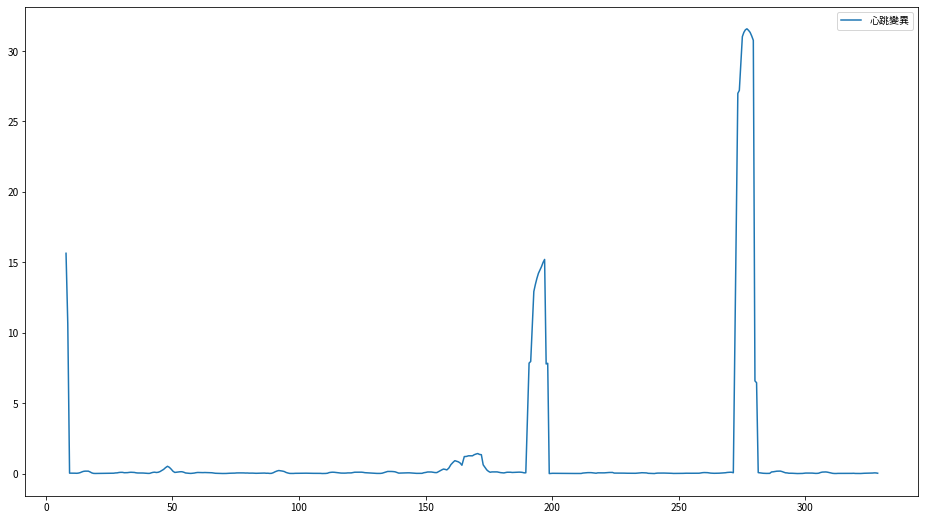

In [ ]:
#此段程式碼透過閥值定義, 自動找出R-peak, 計算平均心率以及HRV
from scipy.signal import find_peaks
import pandas as pd
MiniHigh = 1000

time_start = 185
time_end = 200

plt.rcParams["figure.figsize"] = (16, 9)
plt.figure(1);
plt.clf();
temp = CH3_f[time_start*fs: time_end*fs];
ECG_locs,_ = find_peaks(temp, height=MiniHigh, distance=50)
plt.plot(temp, label='CH3')
plt.legend(loc='best')
plt.hlines(MiniHigh, 1, (time_end-time_start)*fs, colors= 'r',linestyles='--')
plt.plot(ECG_locs, temp[ECG_locs],'ro')


ECG_locs,_ = find_peaks(CH3_f, height=MiniHigh, distance=50)
RRinterval = np.diff(ECG_locs, 1);

RRinterval = pd.Series(RRinterval);
RRinterval_var = RRinterval.rolling(10).var();
plt.figure(2);
plt.plot((ECG_locs[1:-1])/fs, (RRinterval[0:-1]/200),label='心跳間隔')
plt.ylabel('sec');
plt.legend(loc='best');

plt.figure(3);
plt.plot((ECG_locs[1:-1])/fs, (RRinterval_var[0:-1]/200),label='心跳變異')
plt.legend(loc='best');